# BME3053C - Computer Applications for BME

<br/>

<h1 align="center">Convolutional Neural Networks</h1>

---

<center><h2>Lesson: 11</h2></center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/bme3053c/blob/main/lessons/11_Convolutional_Neural_Networks.ipynb)



## Overview

Convolutional Neural Networks (CNNs) are a specialized type of deep learning model that excels in processing data with grid-like structures, such as images. Originally developed for image recognition, CNNs are now widely used in applications like video analysis, natural language processing, and biomedical imaging. This introduction will guide you through the core concepts of CNNs, including their architecture, the convolution operation, pooling layers, and the training process, with in-depth explanations and practical examples.

## When to Use CNNs vs Other Neural Networks

CNNs are particularly powerful when working with image data or spatial data where local features are essential. Compared to fully connected neural networks, which treat all inputs as equally important, CNNs leverage spatial hierarchies in data, making them more efficient and effective for tasks like image classification, object detection, and medical imaging.

For example, a CNN is ideal for recognizing handwritten digits in the MNIST dataset, where spatial features such as curves and edges are critical. On the other hand, a fully connected neural network might be more suitable for predicting housing prices based on numerical input features like square footage or number of bedrooms, as these inputs do not have a spatial relationship. Fully connected neural networks work well for simple tasks with non-image data, while CNNs shine in scenarios that require detecting patterns across different spatial locations.

## When to Use CNNs in Biomedical Applications

CNNs are ideal for tasks such as medical image analysis, where detecting tumors, analyzing radiographic images, or identifying anatomical structures requires recognizing spatial features across images.

## Pros and Cons of Convolutional Neural Networks

### Pros

- **Automatic Feature Extraction**: CNNs can learn relevant features directly from images without requiring manual feature engineering.
- **Translation Invariance**: They are robust to changes in position within images, making them ideal for classification tasks where objects may appear in various locations.
- **Efficient Parameter Sharing**: Convolutional layers use shared weights, reducing the number of parameters compared to fully connected layers.

### Cons

- **High Computational Cost**: CNNs often require significant computational resources and memory, especially for large models.
- **Data Requirements**: They perform best with large datasets. Training a CNN on a small dataset might lead to overfitting without proper regularization techniques, such as dropout or L2 regularization. Alternatively, transfer learning can be employed, where a pre-trained model is fine-tuned on a smaller dataset to achieve better performance.
- **Interpretability**: Understanding what specific features are being learned can be challenging, making them less interpretable compared to simpler models.

## Convolution

Convolution is a fundamental operation in CNNs, especially when dealing with image data. In this context, convolution involves sliding a small filter (kernel) over the input image to produce a feature map that highlights specific patterns, such as edges or textures.

Imagine the filter as a small window that moves across the image, focusing on a few pixels at a time. Each time the filter moves, it calculates a weighted sum of the pixel values under it. This process allows the CNN to learn important features, like edges and corners, which are then used for further analysis in deeper layers.

<center><img  src="https://github.com/uf-bme/bme3053c/raw/main/files/conv-slide.gif"/></center>




[https://hannibunny.github.io/mlbook/neuralnetworks/convolutionDemos.html](https://hannibunny.github.io/mlbook/neuralnetworks/convolutionDemos.html)


## Convolutional Layers

The core concept of CNNs is the convolution operation. A convolutional layer applies several filters (kernels) to the input image, extracting features like edges, textures, and more complex patterns in deeper layers. Each filter moves across the image, calculating dot products between the filter and local regions of the image to produce an output called a feature map.

Convolutional layers help reduce computational complexity by maintaining the spatial relationship between pixels, and they provide parameter sharing, which makes CNNs more efficient.

## Pooling Layers

Pooling is used to reduce the dimensions of feature maps, decreasing computational complexity and preventing overfitting. The most common type is Max Pooling, which takes the maximum value from a patch of the feature map. Pooling layers make the representation more manageable while retaining important features.

- **Max Pooling**: Takes the highest value in each patch.
- **Average Pooling**: Takes the average value.

Pooling introduces translational invariance, meaning that small translations of the input image do not significantly affect the output.

https://github.com/tensorflow/lucid?tab=readme-ov-file#recomended-reading

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))



## Flattening and Fully Connected Layers

After a series of convolutional and pooling layers, the output feature maps are flattened into a single vector. This vector is passed through fully connected (dense) layers that perform the final classification. These layers are similar to traditional neural networks and help combine features extracted by previous layers to make predictions.

In [22]:
from tensorflow.keras.layers import Flatten, Dense

# Adding flatten and dense layers to the model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

## Visualizing the Dataset

The `tf_flowers` dataset contains 3,670 color images of flowers divided into 5 different classes: daisy, dandelion, roses, sunflowers, and tulips. The images are of varying sizes and were collected from public photo repositories. Each image is labeled with its corresponding flower class.
The dataset is commonly used for image classification tasks and is a great example for demonstrating CNN capabilities. The images have natural variations in lighting, angle, and background, making it a realistic dataset for training robust models.
Let's visualize a few samples to see examples from each class and understand the variety of images our CNN will need to learn to classify.

## Loading the Dataset

To demonstrate the capabilities of CNNs, we will work with an online image dataset. For this example, we will use the `tf_flowers` dataset, which contains images of different flower species. This dataset can be accessed via TensorFlow Datasets. We will download the dataset and prepare it for training, including normalization and reshaping to fit the CNN input requirements.

In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Flowers dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Get dataset info
ds_info = tfds.load(
    'tf_flowers',
    with_info=True
)[1]

# Normalize and resize the images
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=ds_info.features['label'].num_classes)
    return image, label

# Apply preprocessing
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

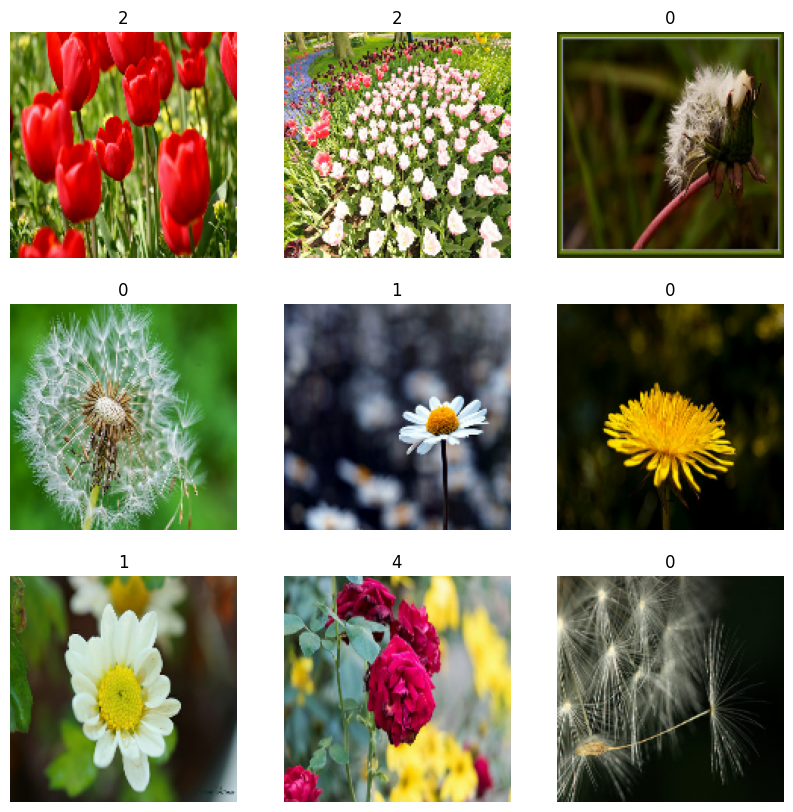

In [14]:
import matplotlib.pyplot as plt

# Visualize a few examples from the dataset
def visualize_dataset(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(3, 3, i + 1)
        # Take first image from batch since dataset is batched
        plt.imshow(images[0])
        plt.title(tf.argmax(labels[0]).numpy())
        plt.axis('off')
    plt.show()

# Visualize samples from the training dataset
visualize_dataset(ds_train)

## Training a CNN

To train the CNN, we compile the model with a suitable loss function and optimizer. The most common optimizer is Adam, which adapts the learning rate during training. We then fit the model using the training data and validate it on the test set.

In [25]:
from tensorflow.keras.optimizers import Adam

# Compile and train the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(ds_train, epochs=1, validation_data=ds_test)

43/92 ━━━━━━━━━━━━━━━━━━━━ 1:12 1s/step - accuracy: 0.4111 - loss: 3.6950

## Visualizing Feature Maps

One of the ways to understand how CNNs work is to visualize feature maps, which show the output of convolutional layers for a given input image. This helps provide insight into the kind of features being learned at different stages of the network.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Create a new model to output feature maps
layer_outputs = [layer.output for layer in model.layers[:3]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
sample_image, _ = next(iter(ds_test))
activations = activation_model.predict(sample_image[:1])

# Visualize the first convolution layer's feature maps
first_layer_activation = activations[0]
plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

## Practical Example: Image Classification

We will use the trained CNN to classify images from the test set. The output will be the predicted label of each image. This step helps evaluate the accuracy of the CNN in real-world scenarios.

In [ ]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

## Summary

Convolutional Neural Networks have revolutionized computer vision by automating feature extraction and learning spatial hierarchies from data. They consist of convolutional layers to extract features, pooling layers for dimensionality reduction, and fully connected layers for classification. Despite requiring substantial computational power and large datasets, CNNs are invaluable due to their ability to automatically learn complex features, making them highly effective for image-based tasks.